<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/20324_OD_cup_normal_vs_large_binary_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/1324Optic disc photos/split'), os.listdir('/content/drive/MyDrive/1324Optic disc photos/split/train')


(['train', 'val', 'test'], ['normal_discs', 'possibly_glaucomatous'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/1324Optic disc photos/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/1324Optic disc photos/split/val',
                                        target_size=(64,64),
                                        class_mode='binary')

testimages = datagen.flow_from_directory('/content/drive/MyDrive/1324Optic disc photos/split/test',
                                         target_size=(64,64),
                                         class_mode='binary')

Found 61 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Conv2D(128,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(128,(3,3), activation='relu'),
                    MaxPooling2D(3,2),

                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [44]:
model.fit(trainimages,
          batch_size=10,
          epochs=10,
          validation_data=valimages)
model.save('ODbinary_model.keras')

Epoch 1/10
2/2 [==============================] - 2s 1s/step - loss: 3.8228e-05 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.8824
Epoch 2/10
2/2 [==============================] - 1s 634ms/step - loss: 3.7300e-05 - accuracy: 1.0000 - val_loss: 0.4058 - val_accuracy: 0.8824
Epoch 3/10
2/2 [==============================] - 1s 642ms/step - loss: 3.6231e-05 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.8824
Epoch 4/10
2/2 [==============================] - 1s 504ms/step - loss: 3.6169e-05 - accuracy: 1.0000 - val_loss: 0.4097 - val_accuracy: 0.8824
Epoch 5/10
2/2 [==============================] - 1s 777ms/step - loss: 3.4435e-05 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 0.8824
Epoch 6/10
2/2 [==============================] - 1s 665ms/step - loss: 3.3479e-05 - accuracy: 1.0000 - val_loss: 0.4200 - val_accuracy: 0.8824
Epoch 7/10
2/2 [==============================] - 1s 586ms/step - loss: 3.2847e-05 - accuracy: 1.0000 - val_loss: 0.4217 - val_accuracy: 0.

In [45]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 0s 160ms/step


array([[4.9414177e-07],
       [1.0000000e+00],
       [2.6630784e-07],
       [9.9990416e-01],
       [1.0790305e-08],
       [9.9999988e-01],
       [9.9999994e-01],
       [9.9645835e-01],
       [1.0463509e-08],
       [9.9901432e-01]], dtype=float32)

In [46]:
y_pred[y_pred<0.5]=0
y_pred[y_pred>0.5]=1

In [15]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
testimages.class_indices

{'normal_discs': 0, 'possibly_glaucomatous': 1}

In [47]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

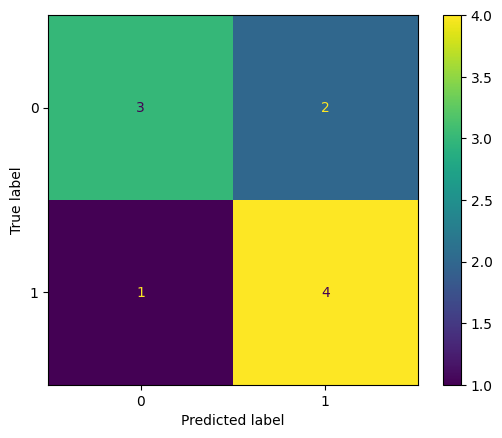

In [48]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

In [49]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['normal disc', 'possibly glaucomatous']))

                       precision    recall  f1-score   support

          normal disc       0.75      0.60      0.67         5
possibly glaucomatous       0.67      0.80      0.73         5

             accuracy                           0.70        10
            macro avg       0.71      0.70      0.70        10
         weighted avg       0.71      0.70      0.70        10



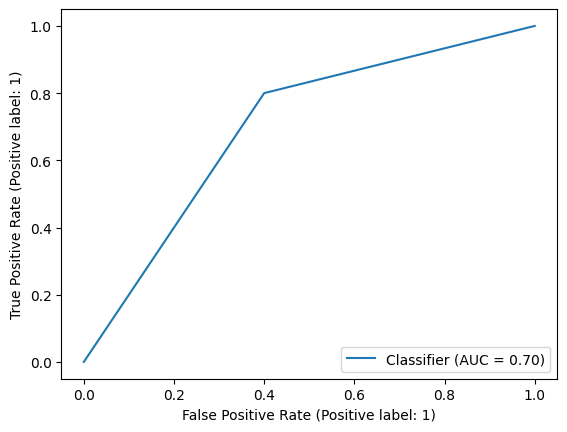

In [50]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

1/1 [==============================] - 0s 223ms/step
Prediction: normal disc


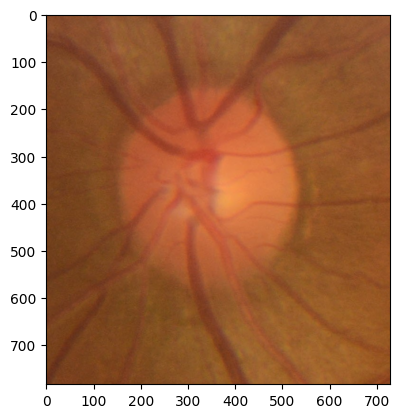

In [53]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/ODbinary_model.keras') # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        return "normal disc"  # Example class names, modify as per your binary classes
    else:
        return "possibly glaucomatous"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/1324Optic disc photos/normal_discs/Label 14.JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/1324Optic disc photos/normal_discs/Label 14.JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 41ms/step
Prediction: possibly glaucomatous


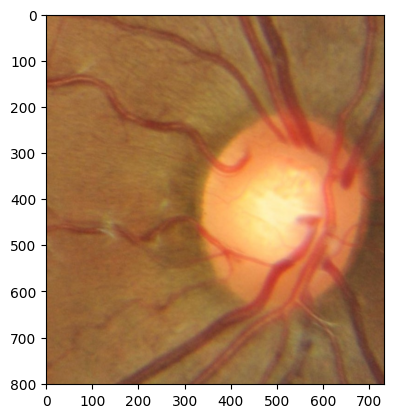

In [55]:
unknown_image_path = "/content/drive/MyDrive/1324Optic disc photos/possibly_glaucomatous/Large 13.JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage2 = image.load_img('/content/drive/MyDrive/1324Optic disc photos/possibly_glaucomatous/Large 13.JPG')
plt.imshow(testimage2)
